##NAIVE BAYES

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('titanic.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[106 0 3 ... '349207' 7.8958 nan]
 [69 1 3 ... '3101281' 7.925 nan]
 [254 0 3 ... 'A/5. 3336' 16.1 nan]
 ...
 [630 0 3 ... '334912' 7.7333 nan]
 [560 1 3 ... '345572' 17.4 nan]
 [685 0 2 ... '29750' 39.0 nan]]


In [ ]:
print(y_train)

['S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C'
 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S'
 'Q' 'S' 'C' 'C' 'S' 'Q' 'C' 'S' 'C' 'S' 'C' 'S' 'S' 'C' 'S' 'C' 'S' 'S'
 'S' 'Q' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S'
 'S' 'S' 'S' 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'C' 'S' 'Q' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S'
 'S' 'C' 'S' 'Q' 'S' 'Q' 'C' 'Q' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'C' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'Q' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S'
 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S'
 'C' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S

In [ ]:
print(X_test)

[[496 0 3 ... '2627' 14.4583 nan]
 [649 0 3 ... 'S.O./P.P. 751' 7.55 nan]
 [279 0 3 ... '382652' 29.125 nan]
 ...
 [380 0 3 ... '347069' 7.775 nan]
 [743 1 1 ... 'PC 17608' 262.375 'B57 B59 B63 B66']
 [11 1 3 ... 'PP 9549' 16.7 'G6']]


In [ ]:
print(y_test)

['C' 'S' 'Q' 'C' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'Q' 'S' 'C' 'S' 'S' 'S'
 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'C'
 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S'
 'C' 'S' 'S' 'S' 'S' 'Q' 'C' 'S' 'C' 'C' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S'
 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'C'
 'S' 'S' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C'
 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'Q' 'S' 'Q'
 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'S' 'Q' 'C' 'S' 'C'
 'C' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'C' 'S' 'S' 'C'
 'S' 'C' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'Q' 'C' 'S' 'S'
 'S' 'S' 'S' 'C' 'S' 'C' 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'C' 'S' 'S'
 'C' 'S' 'S' 'C' 'S' 'C' 'S']


##Handling missing value

In [ ]:
# Handle missing values (filling with mean as an example)
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)

## Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Scaled Training Data:\n", X_train)

Scaled Training Data:
 [[-0.14358693 -0.48380773]
 [-0.99275516 -0.48323058]
 [ 0.01080729 -0.32165051]
 ...
 [-0.01241996 -0.48701956]
 [ 0.47398996 -0.29595582]
 [ 2.32672063  0.13097136]]


In [ ]:
print(X_train)

[[-0.13126581 -0.48380773]
 [-0.89122579 -0.48323058]
 [ 0.00690873 -0.32165051]
 ...
 [        nan -0.48701956]
 [ 0.42143235 -0.29595582]
 [ 2.07952685  0.13097136]]


In [ ]:
print(X_test)

[[        nan -0.35409895]
 [        nan -0.49064251]
 [-1.5820985  -0.06420947]
 [        nan  2.25613578]
 [-0.06217854 -0.3385339 ]
 [        nan -0.03703239]
 [ 0.69778144  2.3933395 ]
 [ 0.075996    2.61874519]
 [-0.33852763  1.1603244 ]
 [        nan -0.49698317]
 [-0.26944036 -0.48462996]
 [ 0.69778144 -0.38292246]
 [        nan -0.48668949]
 [-1.5820985  -0.12103427]
 [-0.4076149   1.00376665]
 [-1.09848761 -0.48462996]
 [-0.47670217 -0.45753589]
 [-0.75305125  0.08649978]
 [ 0.35234508 -0.48075994]
 [-2.03669274 -0.47153555]
 [-0.82213852 -0.41257018]
 [-0.54578944  2.35553865]
 [        nan -0.48693655]
 [        nan -0.02714982]
 [-0.54578944 -0.44542974]
 [ 0.69778144  2.0185429 ]
 [ 0.14508327 -0.48380773]
 [-0.54578944 -0.48668949]
 [-0.33852763 -0.12597555]
 [-1.92753486 -0.08842177]
 [ 0.21417054 -0.46865379]
 [ 1.38865414 -0.43233533]
 [-0.13126581 -0.45210048]
 [        nan  0.06179334]
 [-0.06217854 -0.5006081 ]
 [ 0.14508327 -0.03703239]
 [ 0.90504325 -0.51238418]
 

In [ ]:
# Check for NaN values in X and y before splitting
print("Checking for NaN values in feature matrix (X):", pd.DataFrame(X).isna().sum().sum())
print("Checking for NaN values in target vector (y):", pd.Series(y).isna().sum())

Checking for NaN values in feature matrix (X): 0
Checking for NaN values in target vector (y): 0


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

##Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

[1]


##Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

##Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[134   5]
 [ 63  21]]


0.695067264573991

##Visualising the Training set results

<ipython-input-59-2ca01a0d163f>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


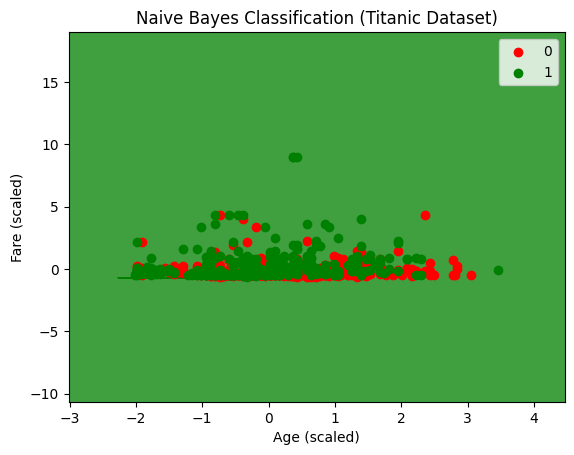

In [ ]:
# Create mesh grid for contour plot
X_set, y_set = X_scaled, y
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=0.01))

# Create contour plot
plt.contourf(X1, X2, classifier.predict(sc.inverse_transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes Classification (Titanic Dataset)')
plt.xlabel('Age (scaled)')
plt.ylabel('Fare (scaled)')
plt.legend()
plt.show()


##Visualising the Test set results

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-62-5c8e36181fc9>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


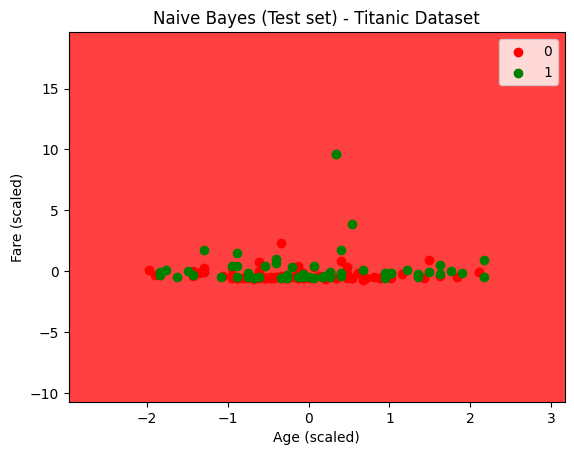

In [ ]:
# Visualizing the Test set results
X_set, y_set = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 10, stop=X_set[:, 1].max() + 10, step=0.01))
# Create contour plot
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for the test set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Test set) - Titanic Dataset')
plt.xlabel('Age (scaled)')
plt.ylabel('Fare (scaled)')
plt.legend()
plt.show()


##**CONCLUSION:**

In this practical, we implemented a Naive Bayes classifier to predict survival outcomes from the Titanic dataset using key features, specifically Age and Fare. After preprocessing the data, scaling the features, and splitting it into training and testing sets, we trained the model and visualized the classification results. The contour plot illustrates the decision boundaries established by the classifier, while the scatter plot displays the actual test data points, effectively demonstrating how well the model differentiates between survivors and non-survivors. This exercise not only showcases the application of Naive Bayes in classification tasks but also emphasizes the importance of data preprocessing and visualization in understanding model performance.